Looking at our first data over the canal!

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from trajectory import Trajectory

plt.rcParams['figure.figsize'] = (17.0, 10.0)
sns.set_context('talk')

In [3]:
# load the data into our trajectory object
t = Trajectory(fileType='binary', directory='/home/pprandi/dev/hydrones/data/Test1', motif='HD_test*')

['/home/pprandi/dev/hydrones/data/Test1/HD_test_20160828_090005000000', '/home/pprandi/dev/hydrones/data/Test1/HD_test_20160828_090106000000', '/home/pprandi/dev/hydrones/data/Test1/HD_test_20160828_090207000000', '/home/pprandi/dev/hydrones/data/Test1/HD_test_20160828_090308000000', '/home/pprandi/dev/hydrones/data/Test1/HD_test_20160828_090409000000', '/home/pprandi/dev/hydrones/data/Test1/HD_test_20160828_090510000000', '/home/pprandi/dev/hydrones/data/Test1/HD_test_20160828_090611000000', '/home/pprandi/dev/hydrones/data/Test1/HD_test_20160828_090712000000', '/home/pprandi/dev/hydrones/data/Test1/HD_test_20160828_090813000000', '/home/pprandi/dev/hydrones/data/Test1/HD_test_20160828_090914000000', '/home/pprandi/dev/hydrones/data/Test1/HD_test_20160828_091015000000', '/home/pprandi/dev/hydrones/data/Test1/HD_test_20160828_091116000000']
reading from file /home/pprandi/dev/hydrones/data/Test1/HD_test_20160828_090005000000
reading from file /home/pprandi/dev/hydrones/data/Test1/HD_te

In [4]:
t._measurements.head()

,baro_altitude,baro_pressure,baro_sea_level_pressure,baro_temperature,day,gps_altitude,gps_geoidheight,gps_lat,gps_lon,gps_nbsat,...,imu_linear_accel_z,imu_pitch_angle,imu_roll_angle,leddar_ampl,leddar_range,min,month,sec,usec,year
2016-08-28 09:00:06,75.203079,100428.0,100429.0,28.299999,28.0,130.0,50.400002,43.522812,1.518720,7.0,...,-0.01,1.125,3.8125,0.259,135.0,0.0,8.0,6.0,0.0,2016.0
2016-08-28 09:00:07,74.909790,100423.0,100430.0,28.299999,28.0,130.0,50.400002,43.522812,1.518722,7.0,...,-0.07,1.125,3.8125,0.259,135.0,0.0,8.0,7.0,0.0,2016.0
2016-08-28 09:00:08,74.448715,100428.0,100429.5,28.299999,28.0,130.0,50.400002,43.522812,1.518722,7.0,...,-0.02,1.125,3.8125,0.259,135.0,0.0,8.0,8.0,0.0,2016.0
2016-08-28 09:00:09,75.162125,100424.5,100424.5,28.299999,28.0,130.0,50.400002,43.522812,1.518722,7.0,...,0.00,1.125,3.8125,0.258,135.0,0.0,8.0,9.0,0.0,2016.0
2016-08-28 09:00:10,74.952057,100430.0,100427.5,28.299999,28.0,130.0,50.400002,43.522812,1.518723,7.0,...,-0.10,1.125,3.8125,0.259,135.0,0.0,8.0,10.0,0.0,2016.0


In [5]:
t._measurements.describe()

,baro_altitude,baro_pressure,baro_sea_level_pressure,baro_temperature,day,gps_altitude,gps_geoidheight,gps_lat,gps_lon,gps_nbsat,...,imu_linear_accel_z,imu_pitch_angle,imu_roll_angle,leddar_ampl,leddar_range,min,month,sec,usec,year
count,660.000000,660.000000,660.000000,660.000000,660.0,660.000000,660.000000,660.000000,660.000000,660.000000,...,660.00000,660.000000,660.000000,660.000000,660.000000,660.000000,660.0,660.000000,660.0,660.0
mean,74.262711,100436.071970,100436.162879,28.851136,28.0,135.009852,50.400002,43.522938,1.518817,7.710606,...,-0.11747,4.880398,0.126515,1.146330,69.653030,5.183333,8.0,29.500000,0.0,2016.0
std,1.291171,15.597548,15.440509,0.325058,0.0,3.552400,0.000000,0.000063,0.000069,0.453825,...,0.48818,2.522269,2.561436,0.547787,50.562624,3.240210,0.0,17.331237,0.0,0.0
min,72.855423,100394.000000,100392.000000,28.100000,28.0,129.800003,50.400002,43.522812,1.518682,7.000000,...,-1.98000,-7.000000,-13.062500,0.124000,2.000000,0.000000,8.0,0.000000,0.0,2016.0
25%,73.484283,100438.375000,100437.875000,28.600000,28.0,130.500000,50.400002,43.522900,1.518775,7.000000,...,-0.31250,3.062500,-1.500000,0.259000,22.750000,2.000000,8.0,14.750000,0.0,2016.0
50%,73.652069,100443.500000,100443.000000,28.799999,28.0,137.600006,50.400002,43.522926,1.518815,8.000000,...,-0.14000,4.812500,0.000000,1.403500,57.000000,5.000000,8.0,29.500000,0.0,2016.0
75%,74.165657,100445.500000,100445.500000,29.100000,28.0,138.000000,50.400002,43.522984,1.518847,8.000000,...,0.06000,6.437500,1.890625,1.509000,134.000000,8.000000,8.0,44.250000,0.0,2016.0
max,77.804398,100452.000000,100452.500000,29.400000,28.0,138.600006,50.400002,43.523087,1.518978,8.000000,...,3.61000,14.000000,5.687500,1.718000,137.000000,11.000000,8.0,59.000000,0.0,2016.0


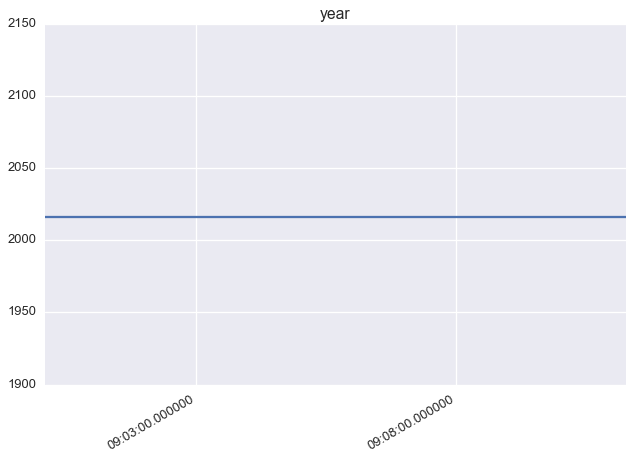

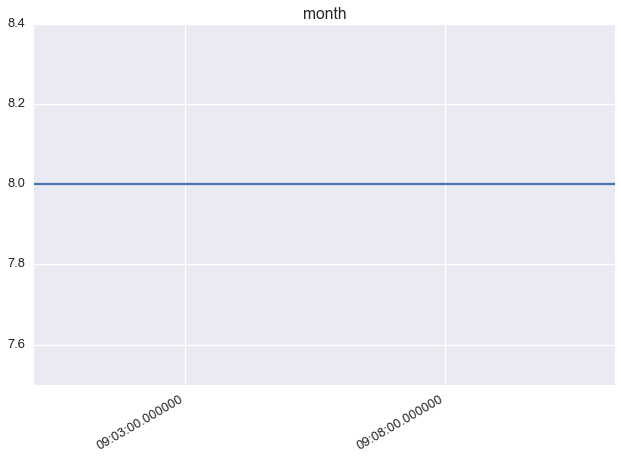

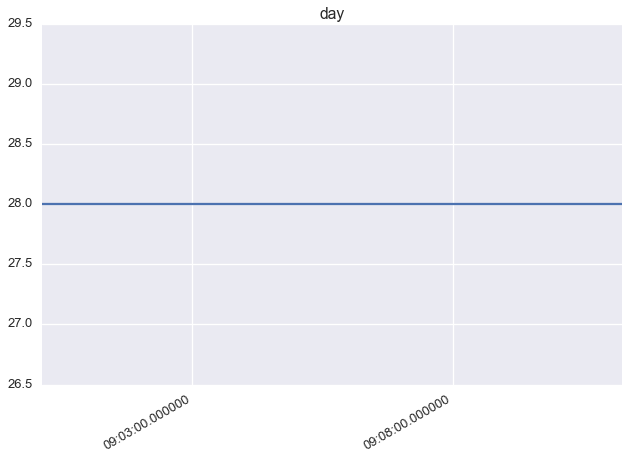

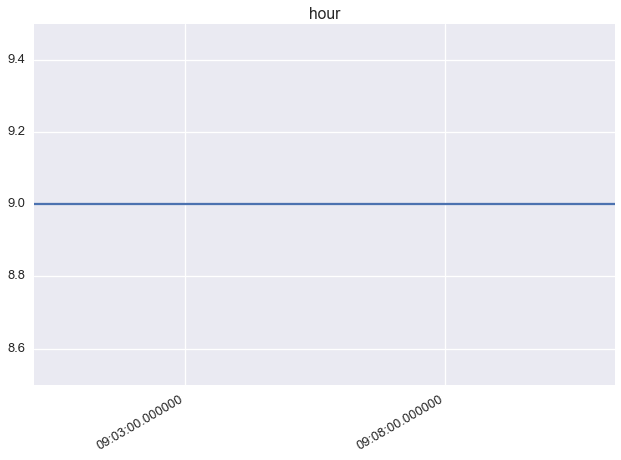

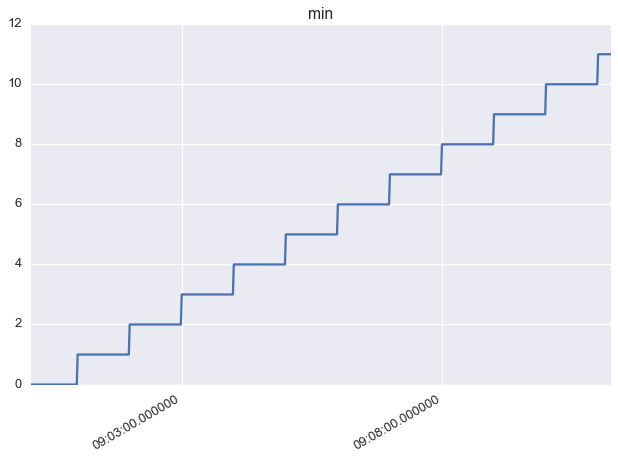

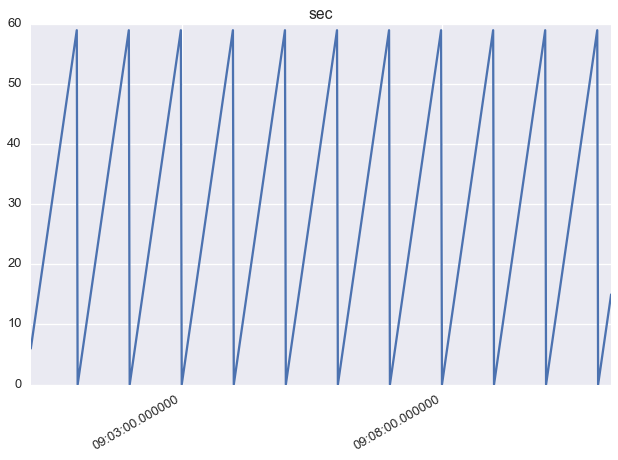

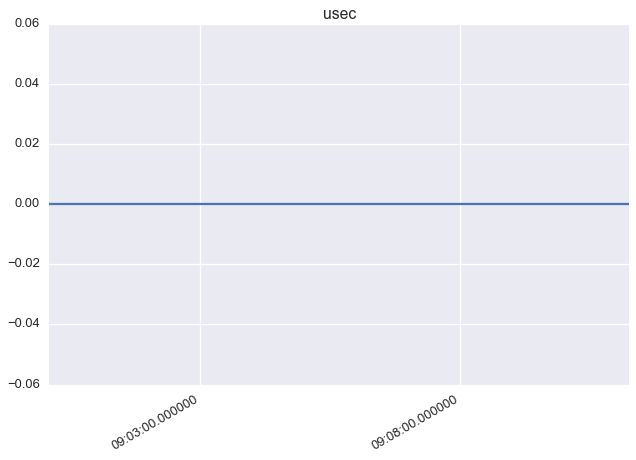

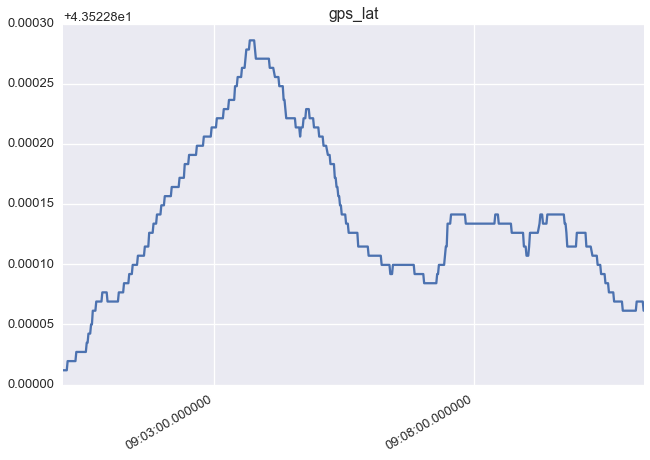

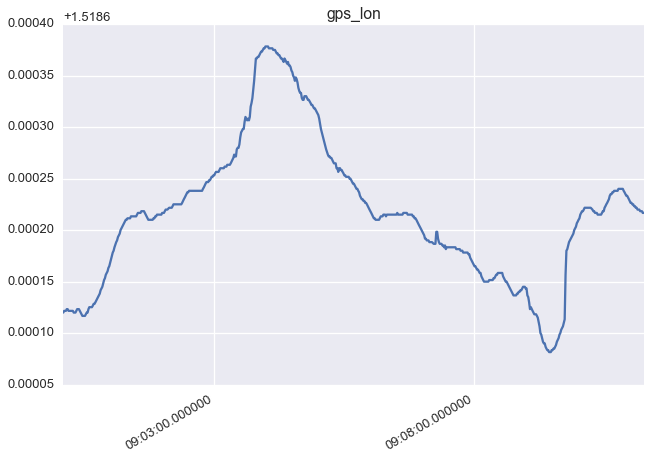

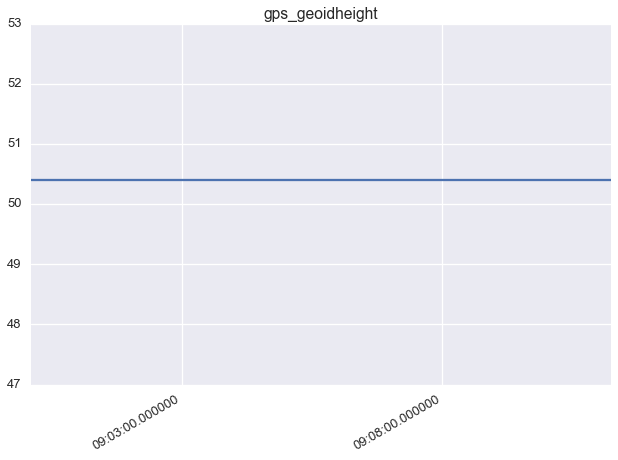

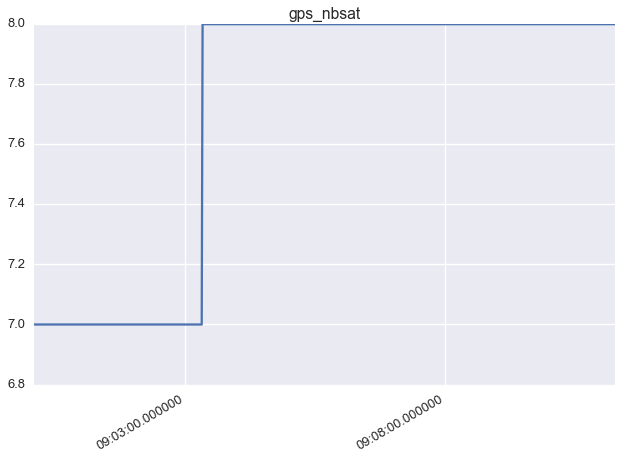

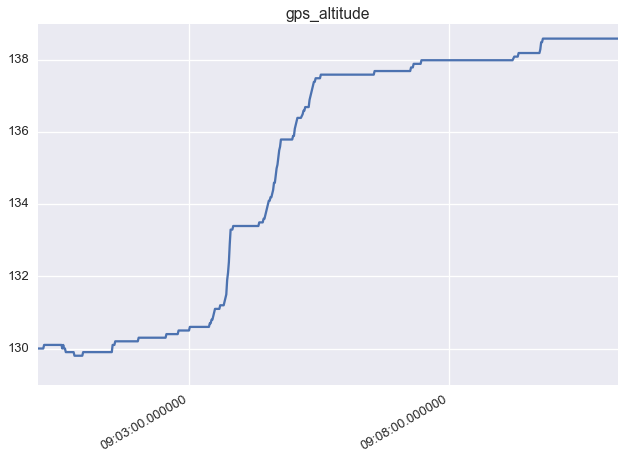

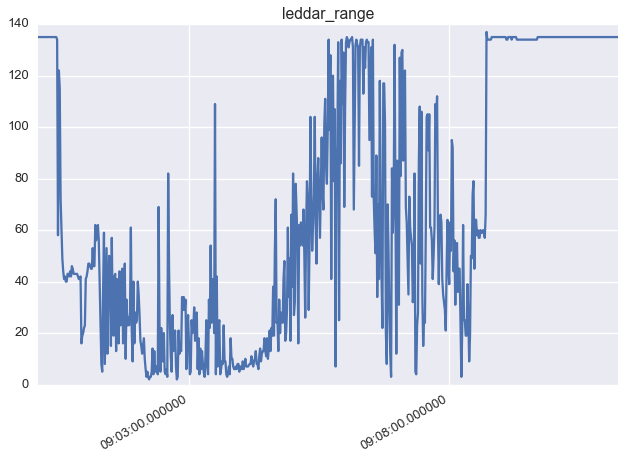

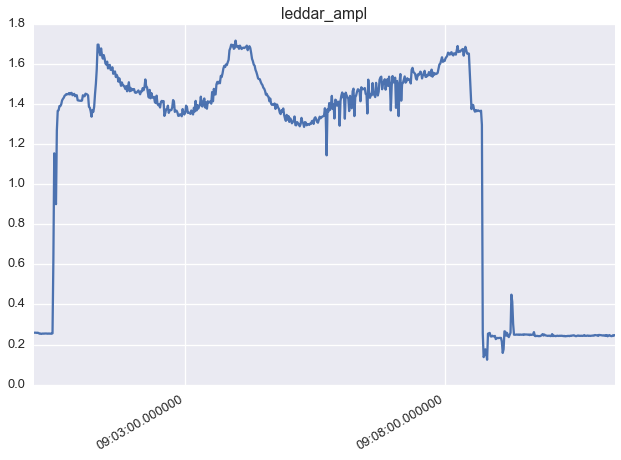

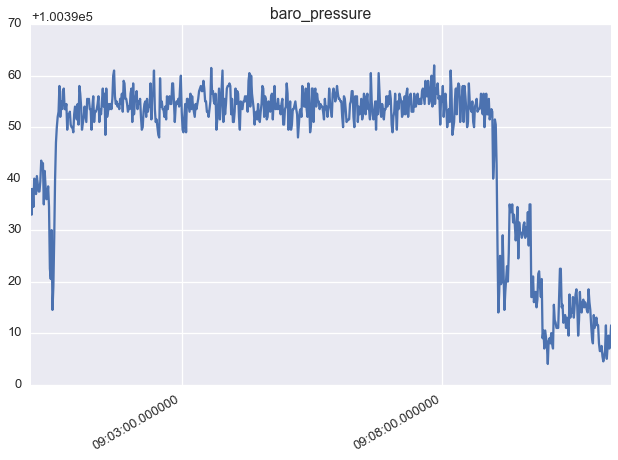

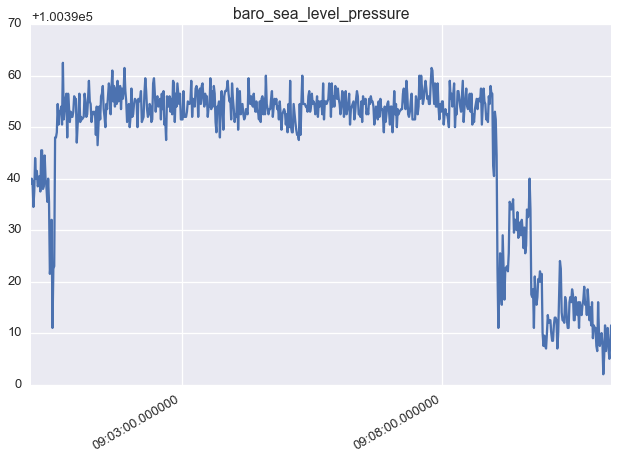

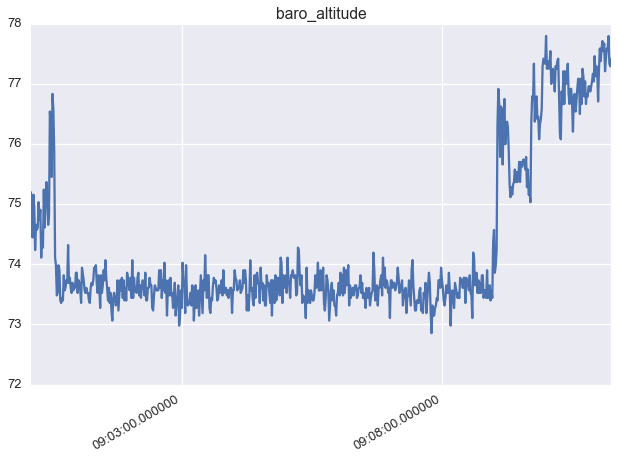

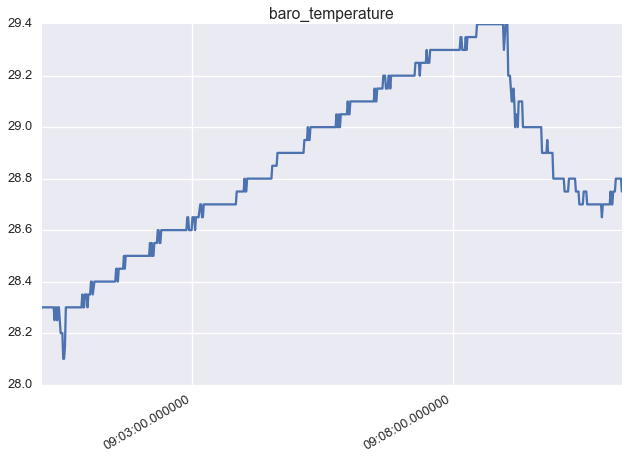

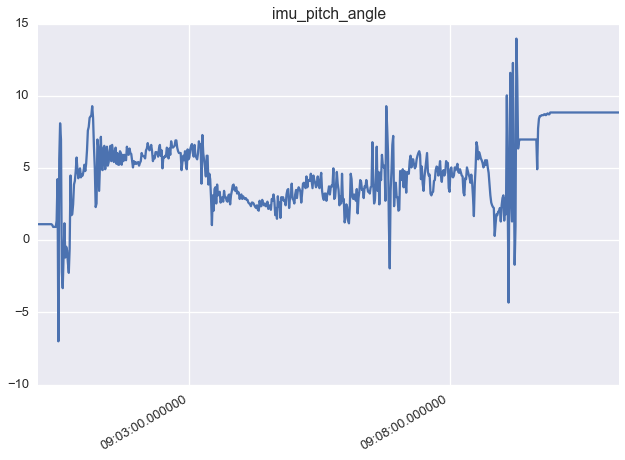

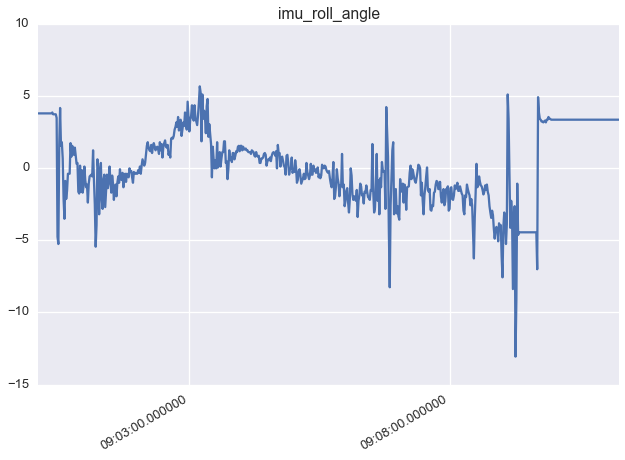

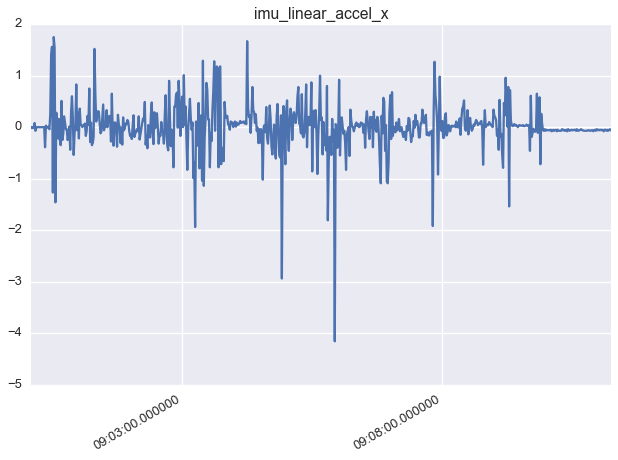

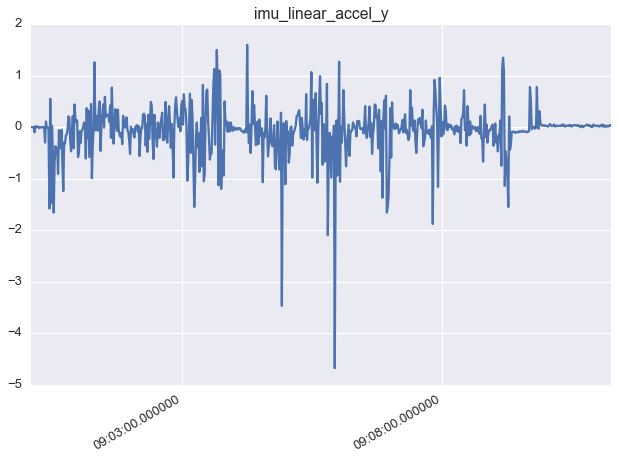

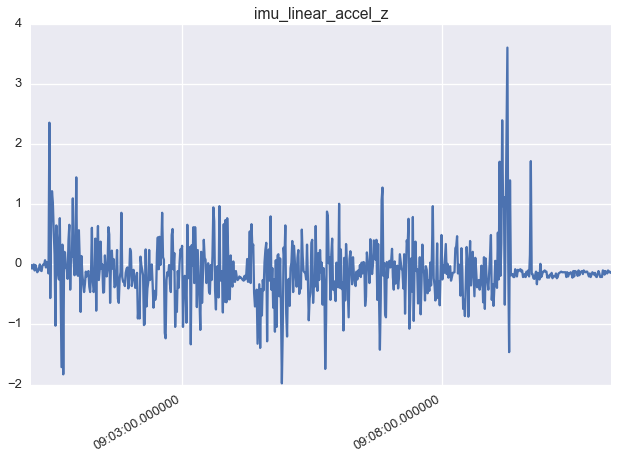

In [6]:
# plotting all variables
for key in t._keys:
    t._measurements[key].plot()
    plt.title(key)
    plt.show()

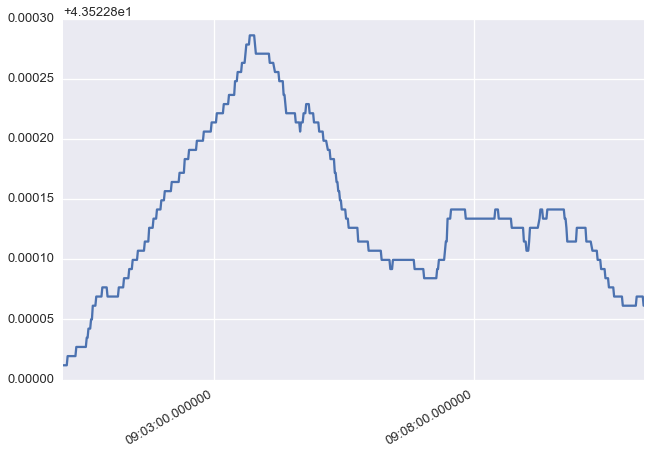

In [7]:
# let's have a look a the position of the data points
t._measurements['gps_lat'].plot()
plt.show()

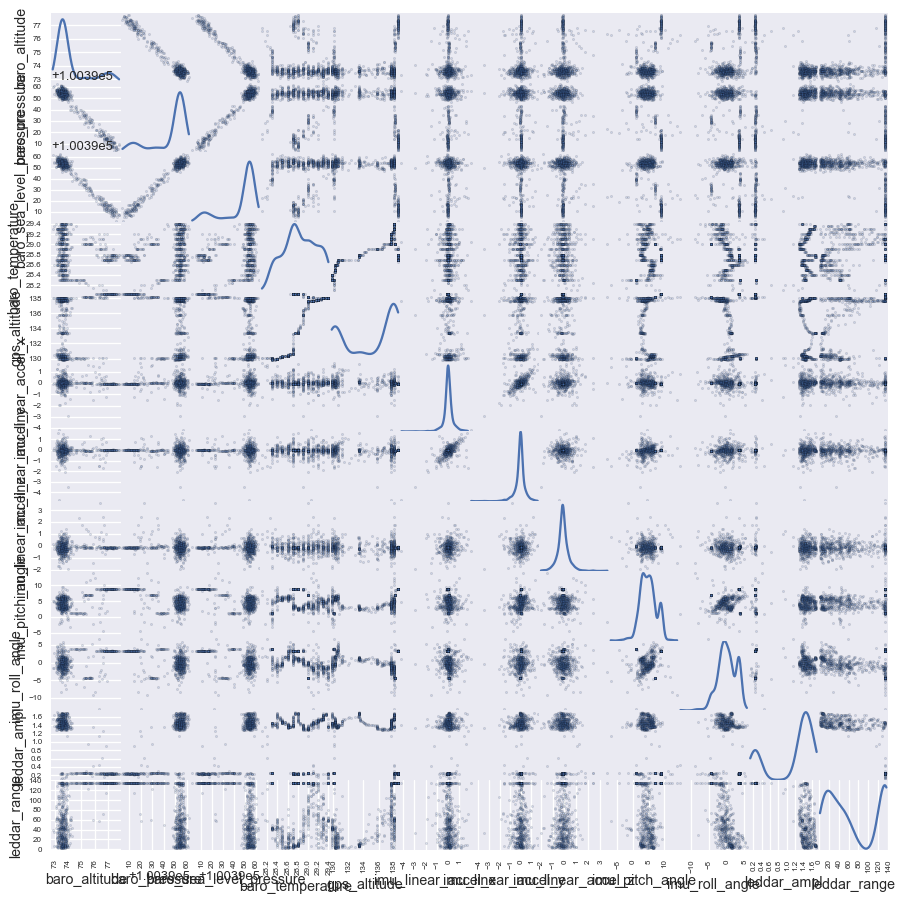

In [17]:
# quick look at dependecies between variables
from pandas.tools.plotting import scatter_matrix
sc=scatter_matrix(pd.DataFrame(t._measurements[[0,1,2,3,5,11,12,13,14,15,16,17]]), alpha=0.2, figsize=(15, 15), diagonal='kde')
plt.show()

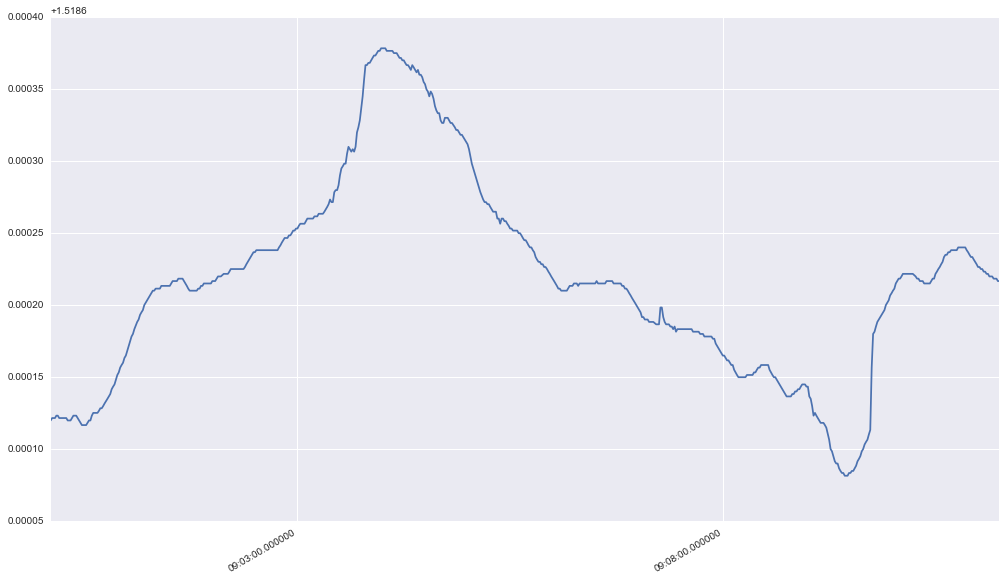

In [80]:
t._measurements['gps_lon'].plot()
plt.show()

In [81]:
# let's plot that on a map
import folium
m = folium.Map([t.currentValue('gps_lat'), t.currentValue('gps_lon')], zoom_start=18, tiles='Stamen Toner')
for i in np.arange(len(t._measurements.index.values)):
    lat = t._measurements['gps_lat'].values[i]
    lon = t._measurements['gps_lon'].values[i]
    folium.CircleMarker(location=[lat, lon], radius=1, fill_color='#3186cc', color='#3186cc').add_to(m)
m
# OK, at least we are where we were !

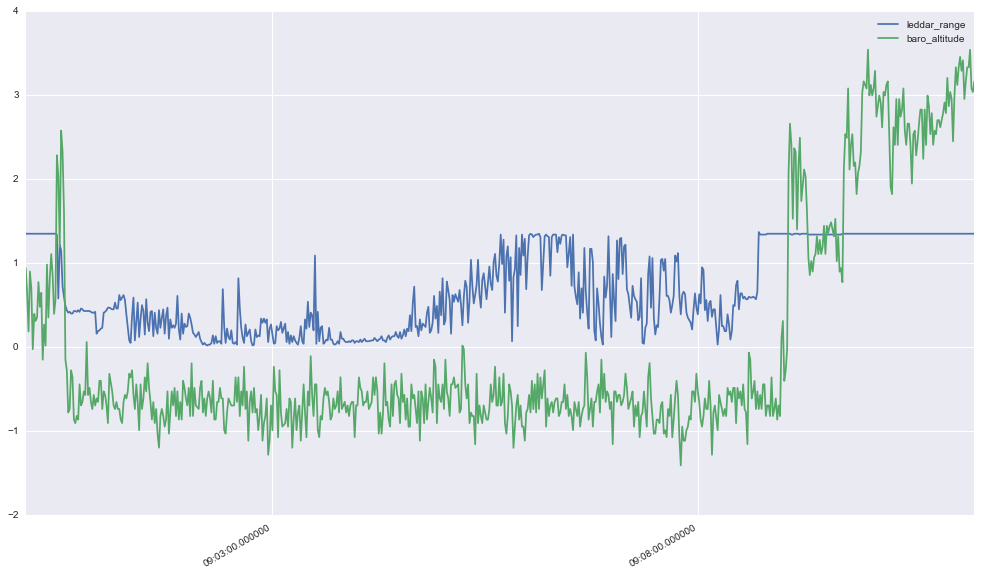

In [82]:
# look at measured values a little bit
t._measurements.loc[:, 'leddar_range'] = t._measurements['leddar_range'] * 0.01
#t._measurements.loc[:, 'leddar_range'] = t._measurements['leddar_range'] - np.mean(t._measurements['leddar_range'].values)
t._measurements.loc[:, 'baro_altitude'] = t._measurements['baro_altitude'] - np.mean(t._measurements['baro_altitude'].values)
t._measurements.loc[:, 'gps_altitude'] = t._measurements['gps_altitude'] - np.mean(t._measurements['gps_altitude'].values)

t._measurements['leddar_range'].plot()
t._measurements['baro_altitude'].plot()
plt.legend()
plt.show()

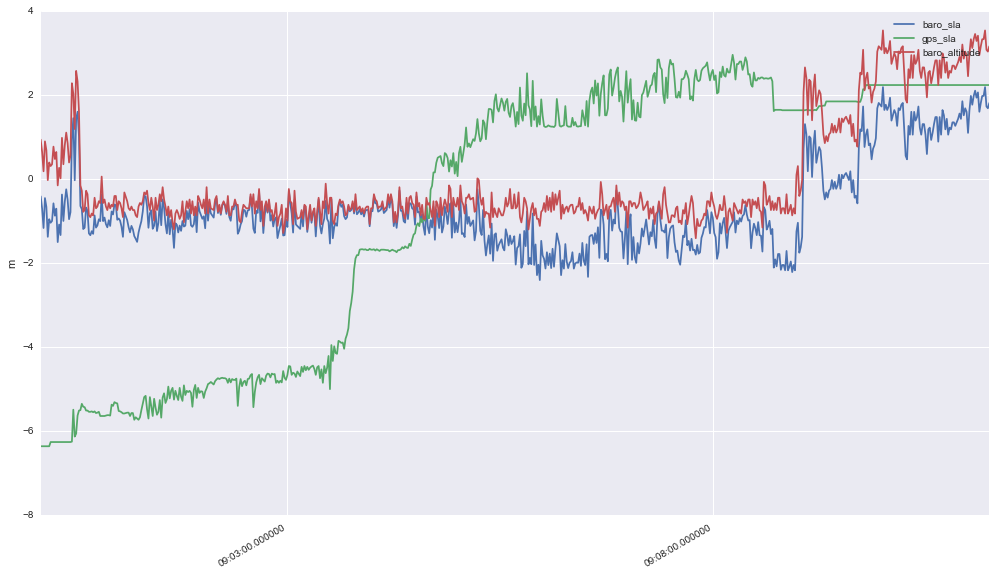

In [83]:
# let's estimate a height from altitude - range (should be as flat as possible)
baro_height = t._measurements['baro_altitude'].values - t._measurements['leddar_range'].values
gps_height = t._measurements['gps_altitude'].values - t._measurements['leddar_range'].values

sla = pd.DataFrame({'baro_sla':baro_height, 'gps_sla': gps_height}, index=t._measurements.index)

sla['baro_sla'].plot()
sla['gps_sla'].plot()

t._measurements['baro_altitude'].plot()
plt.ylabel('m')
plt.legend()
plt.show()